https://towardsdatascience.com/multi-label-text-classification-with-scikit-learn-30714b7819c5 by Susan Li

In [42]:
import pandas as pd
df = pd.read_csv('../Utils/AnalyseDaten.csv',index_col=0)
df.head()

,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue,Character Name,Species,Gender,House,Patronus,...,spell_count,SentimentScore,CompScore,PosScore,NegScore,NeuScore,PosFlag,NegFlag,NeuFlag,chara
0,1,1,8,4,I should have known that you would be here...P...,albus dumbledore,Human,Male,Gryffindor,Phoenix,...,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,0,0,1,['minerva mcgonagall']
1,2,1,8,7,"Good evening, Professor Dumbledore. Are the ru...",minerva mcgonagall,Human,Female,Gryffindor,Cat,...,[],"{'neg': 0.0, 'neu': 0.551, 'pos': 0.449, 'comp...",0.6908,0.449,0.000,0.551,1,0,0,"['albus dumbledore', 'aberforth dumbledore', '..."
2,3,1,8,4,"I'm afraid so, Professor. The good, and the bad.",albus dumbledore,Human,Male,Gryffindor,Phoenix,...,[],"{'neg': 0.256, 'neu': 0.512, 'pos': 0.232, 'co...",-0.0865,0.232,0.256,0.512,0,1,0,[]
3,4,1,8,7,And the boy?,minerva mcgonagall,Human,Female,Gryffindor,Cat,...,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,0,0,1,"['boy', 'boy 2']"
4,5,1,8,4,Hagrid is bringing him.,albus dumbledore,Human,Male,Gryffindor,Phoenix,...,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,0,0,1,['rubeus hagrid']


In [43]:
df = df[pd.notnull(df['Dialogue'])]

In [44]:
import re
def clean_text(row):
    text = row['Dialogue']
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [45]:
df['DialClean'] = df.apply(clean_text, axis=1)

In [46]:
df.head()

,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue,Character Name,Species,Gender,House,Patronus,...,SentimentScore,CompScore,PosScore,NegScore,NeuScore,PosFlag,NegFlag,NeuFlag,chara,DialClean
0,1,1,8,4,I should have known that you would be here...P...,albus dumbledore,Human,Male,Gryffindor,Phoenix,...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,0,0,1,['minerva mcgonagall'],i should have known that you would be here pro...
1,2,1,8,7,"Good evening, Professor Dumbledore. Are the ru...",minerva mcgonagall,Human,Female,Gryffindor,Cat,...,"{'neg': 0.0, 'neu': 0.551, 'pos': 0.449, 'comp...",0.6908,0.449,0.000,0.551,1,0,0,"['albus dumbledore', 'aberforth dumbledore', '...",good evening professor dumbledore are the rumo...
2,3,1,8,4,"I'm afraid so, Professor. The good, and the bad.",albus dumbledore,Human,Male,Gryffindor,Phoenix,...,"{'neg': 0.256, 'neu': 0.512, 'pos': 0.232, 'co...",-0.0865,0.232,0.256,0.512,0,1,0,[],i am afraid so professor the good and the bad
3,4,1,8,7,And the boy?,minerva mcgonagall,Human,Female,Gryffindor,Cat,...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,0,0,1,"['boy', 'boy 2']",and the boy
4,5,1,8,4,Hagrid is bringing him.,albus dumbledore,Human,Male,Gryffindor,Phoenix,...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,0,0,1,['rubeus hagrid'],hagrid is bringing him


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7444 entries, 0 to 7443
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dialogue ID              7444 non-null   int64  
 1   Chapter ID               7444 non-null   int64  
 2   Place ID                 7444 non-null   int64  
 3   Character ID             7444 non-null   int64  
 4   Dialogue                 7444 non-null   object 
 5   Character Name           7444 non-null   object 
 6   Species                  7280 non-null   object 
 7   Gender                   7280 non-null   object 
 8   House                    6527 non-null   object 
 9   Patronus                 4951 non-null   object 
 10  Wand (Wood)              4600 non-null   object 
 11  Wand (Core)              4339 non-null   object 
 12  Chapter Name             7444 non-null   object 
 13  Movie ID                 7444 non-null   int64  
 14  Movie Chapter           

In [48]:
col = ['Character Name', 'DialClean']
df = df[col]

In [49]:
df.columns

Index(['Character Name', 'DialClean'], dtype='object')

In [50]:
df.columns = ['Character_ID', 'DialClean']

In [51]:
df['category_id'] = df['Character_ID'].factorize()[0]
from io import StringIO
category_id_df = df[['Character_ID', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Character_ID']].values)

In [52]:
id_to_category

{0: 'albus dumbledore',
 1: 'minerva mcgonagall',
 2: 'rubeus hagrid',
 3: 'petunia dursley',
 4: 'dudley dursley',
 5: 'vernon dursley',
 6: 'harry potter',
 7: 'student',
 8: 'man',
 9: 'tom',
 10: 'goblin',
 11: 'quirinus quirrell',
 12: 'boy',
 13: 'merpeople',
 14: 'griphook',
 15: 'garrick ollivander',
 16: 'old man',
 17: 'molly weasley',
 18: 'george weasley',
 19: 'fred weasley',
 20: 'ginny weasley',
 21: 'ron weasley',
 22: 'woman',
 23: 'hermione granger',
 24: 'neville longbottom',
 25: 'draco malfoy',
 26: 'sorting hat',
 27: 'seamus finnigan',
 28: 'percy weasley',
 29: 'nearly headless nick',
 30: 'bloody baron',
 31: 'girl',
 32: 'shrunken head',
 33: 'the fat lady',
 34: 'severus snape',
 35: 'rolanda hooch',
 36: 'class',
 37: 'students',
 38: 'boy 2',
 39: 'argus filch',
 40: 'all',
 41: 'oliver wood',
 42: 'filius flitwick',
 43: 'lee jordan',
 44: 'gryffindors',
 45: 'marcus flint',
 46: 'crowd',
 47: 'man in a painting',
 48: 'firenze',
 49: 'voldemort',
 50: 'do

In [53]:
df.head()

,Character_ID,DialClean,category_id
0,albus dumbledore,i should have known that you would be here pro...,0
1,minerva mcgonagall,good evening professor dumbledore are the rumo...,1
2,albus dumbledore,i am afraid so professor the good and the bad,0
3,minerva mcgonagall,and the boy,1
4,albus dumbledore,hagrid is bringing him,0


In [54]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
# df_plt = df[df['Character ID'] <=50]
# df_plt.groupby('Character_ID').DialClean.count().plot.bar(ylim=0)
plt.show()

<Figure size 576x432 with 0 Axes>

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 3), stop_words='english')

features = tfidf.fit_transform(df.DialClean).toarray()
labels = df.category_id
features.shape

(7444, 1396)

In [56]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for CharID, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  trigrams = [v for v in feature_names if len(v.split(' ')) == 3]

  print("# '{}':".format(CharID))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(trigrams[-N:])))

# 'aberforth dumbledore':
  . Most correlated unigrams:
       . brother
       . liked
  . Most correlated bigrams:
       . does matter
       . mundungus fletcher
  . Most correlated bigrams:
       . defense dark arts
       . ha ha ha
# 'alastor moody':
  . Most correlated unigrams:
       . form
       . curse
  . Most correlated bigrams:
       . albus dumbledore
       . come potter
  . Most correlated bigrams:
       . ha ha ha
       . dark arts teacher
# 'albus dumbledore':
  . Most correlated unigrams:
       . severus
       . horace
  . Most correlated bigrams:
       . professor slughorn
       . lord voldemort
  . Most correlated bigrams:
       . defense dark arts
       . tri wizard tournament
# 'albus potter':
  . Most correlated unigrams:
       . slytherin
       . really
  . Most correlated bigrams:
       . harry potter
       . just say
  . Most correlated bigrams:
       . defense dark arts
       . ha ha ha
# 'alecto carrow':
  . Most correlated unigrams:
    

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['DialClean'], df['Character_ID'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [58]:
print(clf.predict(count_vect.transform(["horace slughorn!"])))

['albus dumbledore']


In [59]:
print(clf.predict(count_vect.transform(["I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"])))

['harry potter']


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs f

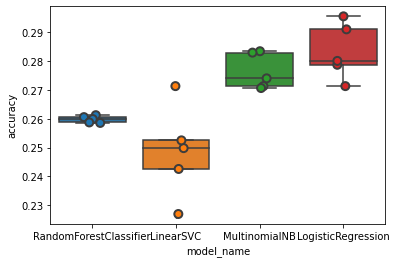

In [61]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [62]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.248656
LogisticRegression        0.283316
MultinomialNB             0.276465
RandomForestClassifier    0.259806
Name: accuracy, dtype: float64

In [63]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)